In [1]:
import sys

sys.path.append('..')

from algo import sample_euler


### define dataset

In [2]:
import numpy as np

def sample_multimodal_distribution(modes, std, batch_size=1000):
    dataset = []
    for i in range(batch_size):
        sample = np.random.randn(modes.shape[1]) * std
        mode_idx = np.random.randint(modes.shape[0])
        sample[0] += modes[mode_idx, 0]
        sample[1] += modes[mode_idx, 1]
        dataset.append(sample)
    return np.array(dataset, dtype="float32")

dataset_size = 10_000
theta = np.array([0., 60, 120, 180, 240,  300]) / 360 * 2 * np.pi
std = 0.5
radius = 20.
modes = np.array([(radius * x, radius * y) for x, y in zip(np.cos(theta), np.sin(theta))])
pi_0 = sample_multimodal_distribution(modes, std, batch_size=dataset_size)
radius = 5.
modes = np.array([(radius * x, radius * y) for x, y in zip(np.cos(theta + 0.5*np.pi), np.sin(theta + 0.5*np.pi))])
pi_1 = sample_multimodal_distribution(modes, std, batch_size=dataset_size)

### compute

In [3]:
import matplotlib.pyplot as plt
import torch

x = torch.tensor(pi_1)

M = 450
z_0 = torch.tensor(pi_0[[90]])
sigma = 0.95

out = sample_euler(z_0, steps=10, x=x, sigma=sigma, M=M)

# plt.imshow(x[5].reshape(image_orginal_size).permute(1, 2, 0), cmap="gray", vmin=0, vmax=1)
# plt.colorbar()

100%|██████████| 10/10 [00:02<00:00,  4.54it/s]


<Axes: xlabel='None', ylabel='None'>

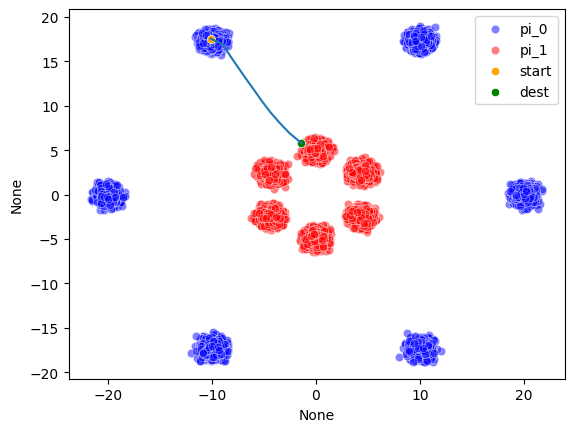

In [4]:
import seaborn
point_x, point_y = out[-1][0].item(), out[-1][1].item()
seaborn.scatterplot(x=pi_0[:, 0], y=pi_0[:, 1], color="blue", alpha=0.5, label="pi_0")
seaborn.scatterplot(x=pi_1[:, 0], y=pi_1[:, 1], color="red", alpha=0.5, label="pi_1")

seaborn.lineplot(x=torch.stack(out)[:, 0], y=torch.stack(out)[:, 1])
seaborn.scatterplot(x=z_0[:, 0], y=z_0[:, 1], color="orange", alpha=1.0, label="start")
seaborn.scatterplot(x=[point_x], y=[point_y], color="green", alpha=1.0, label="dest")